# Kaggle Spaceship titanic Competition 시작
- https://www.kaggle.com/competitions/spaceship-titanic

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 추후 분석 예정

- PassengerId에서 동승자 여부에 따른 컬럼 추가하기

# train data column 설명
- PassengerId : gggg_pp -> g(그룹명), p(그룹내 번호) 대체로 가족인 경우가 많지만 전부 다 그렇지는 않다
- HomePlanet : 출발한 행성(일반적으로 영주권을 갖고 있는 행성)
- CryoSleep : cryosleep의 뜻은 냉동수면, 아마도 냉동수면 여부를 의미하는듯?
- Cabin : 함실번호, deck/num/side -> 등급/번호/사이드(P : Port 좌현, S : Starboard 우현)
- Destination : 도착지
- Age : 나이
- VIP : vip 서비스 신청했는지 여부
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck : 여가서비스에 사용한 돈
- Name : 이름
--------------------------
- TargetColumn
- Transported : 다른 차원으로 이동 됬는지 여부 --> 타겟컬럼

In [2]:
train = pd.read_csv("./Data/train.csv")
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
# Name컬럼은 이용가치가 없으므로 제외
train.drop("Name", axis=1, inplace=True)

In [11]:
# NA값 지우기
train_na = train.copy()
for col in train_na.columns:
    print(col)
    train_na = train_na.drop(train_na[train_na[col].isna()].index)

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
Age
VIP
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [13]:
train_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6764 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6764 non-null   object 
 1   HomePlanet    6764 non-null   object 
 2   CryoSleep     6764 non-null   object 
 3   Cabin         6764 non-null   object 
 4   Destination   6764 non-null   object 
 5   Age           6764 non-null   float64
 6   VIP           6764 non-null   object 
 7   RoomService   6764 non-null   float64
 8   FoodCourt     6764 non-null   float64
 9   ShoppingMall  6764 non-null   float64
 10  Spa           6764 non-null   float64
 11  VRDeck        6764 non-null   float64
 12  Transported   6764 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 693.6+ KB


In [10]:
np.unique(train["Transported"], return_counts=True)

(array([False,  True]), array([4315, 4378], dtype=int64))

In [12]:
# Target Column 비율 확인 - 비슷한 비율을 가지고 있음
np.unique(train_na["Transported"], return_counts=True)

(array([False,  True]), array([3363, 3401], dtype=int64))

In [16]:
train_na.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [22]:
train_na["RoomService"]

0         0.0
1       109.0
2        43.0
3         0.0
4       303.0
        ...  
8688      0.0
8689      0.0
8690      0.0
8691      0.0
8692    126.0
Name: RoomService, Length: 6764, dtype: float64

RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


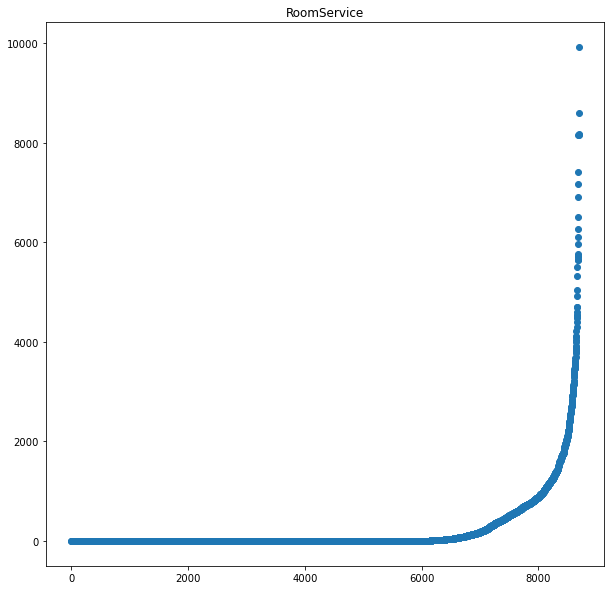

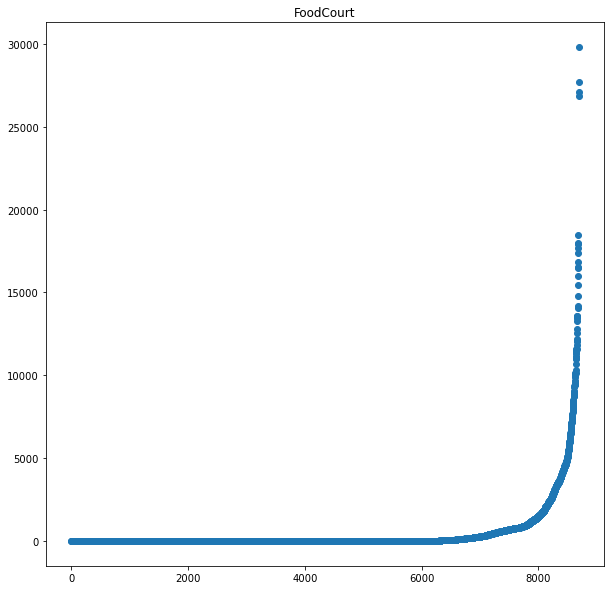

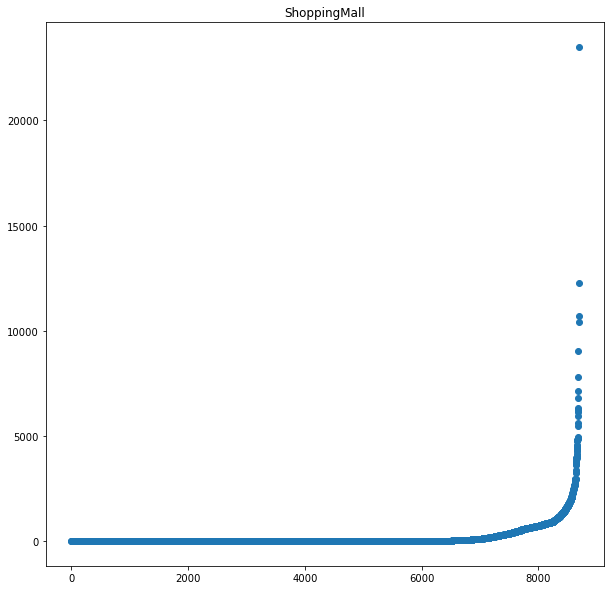

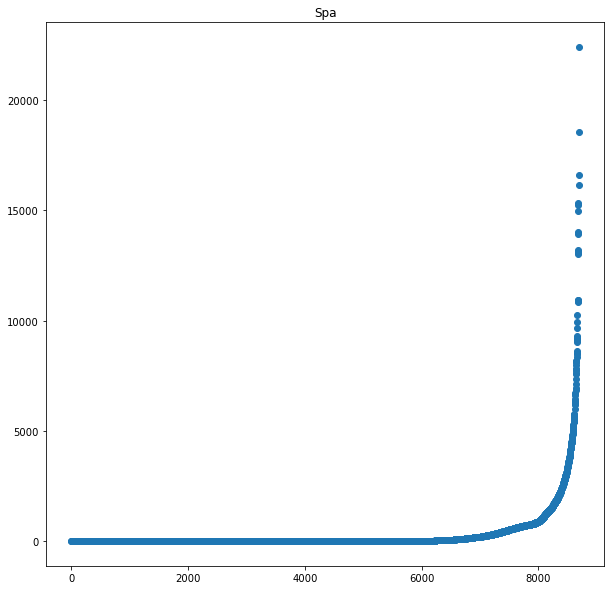

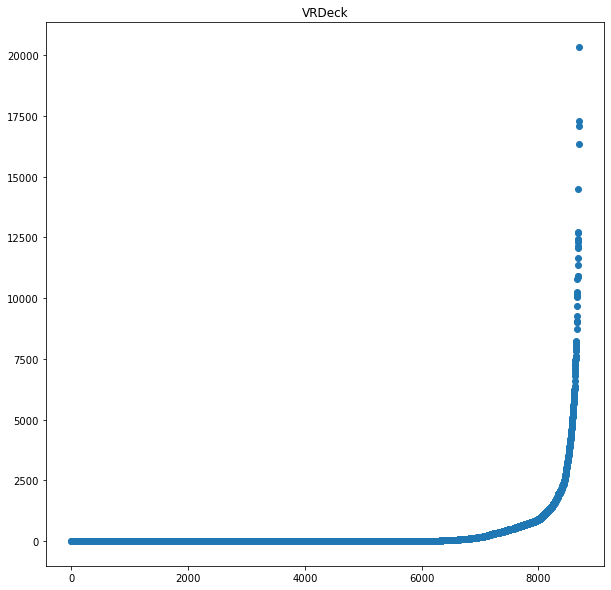

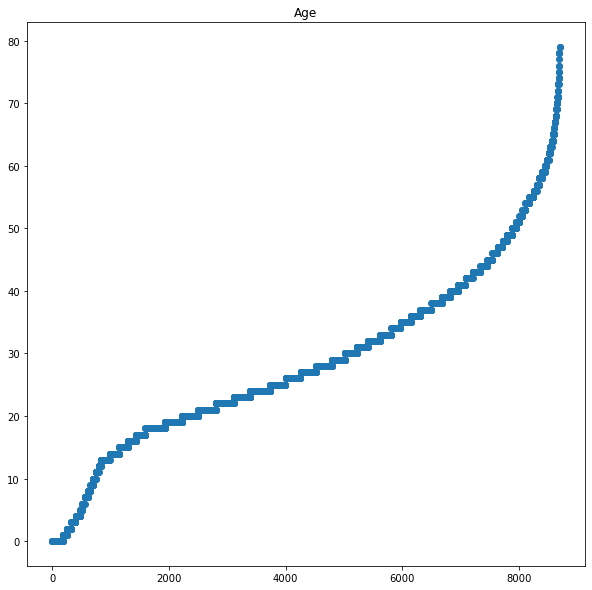

In [38]:
for col in train_na.columns[7:12]:
    print(col)
    plt.figure(figsize=(10,10))
    plt.title(col)
    plt.scatter(train_na.index, train_na[col].sort_values())

plt.figure(figsize=(10,10))
plt.title("Age")
plt.scatter(train_na.index, train_na["Age"].sort_values())